<a href="https://colab.research.google.com/github/sebasanchez3101-cell/trabajos-ciencia-de-datos/blob/main/entornos_virtuales_entrega_en_clase_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
elaborado por johan sebastian sanchez gomez

In [ ]:
!pip install virtualenv
!virtualenv data_science_env

created virtual environment CPython3.12.12.final.0-64 in 513ms
  creator CPython3Posix(dest=/content/data_science_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==25.2
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!data_science_env/bin/pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
import sys
venv_path = '/content/data_science_env/lib/python3.10/site-packages'
sys.path.insert(1, venv_path)


In [ ]:
import pandas
# La ruta impresa debe apuntar al directorio del venv
print(pandas.__file__)

/usr/local/lib/python3.12/dist-packages/pandas/__init__.py


In [ ]:
import sys
venv_path = '/content/data_science_env/lib/python3.10/site-packages'

# Comprobar si la ruta est´a en sys.path antes de intentar eliminarla
if venv_path in sys.path:
  sys.path.remove(venv_path)
  print(f"Ruta {venv_path} eliminada de sys.path.")
  print("El kernel ahora usar´a los paquetes del entorno base de Colab.")
else:
 print("La ruta del entorno virtual no se encontr´o en sys.path.")

Ruta /content/data_science_env/lib/python3.10/site-packages eliminada de sys.path.
El kernel ahora usar´a los paquetes del entorno base de Colab.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
print("Confirmaci´on: Todas las bibliotecas se importaron correctamente.")

 # Verificaci´on adicional para Colab para confirmar la ruta
if 'google.colab' in sys.modules:
  print(f"\nVerificando ruta de Pandas en Colab...")
print(pandas.__file__)

Confirmaci´on: Todas las bibliotecas se importaron correctamente.

Verificando ruta de Pandas en Colab...
/usr/local/lib/python3.12/dist-packages/pandas/__init__.py


In [ ]:
import pandas as pd

# URL del conjunto de datos "Online Retail" del repositorio UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"

# Se usa read_excel ya que la fuente es un archivo Excel

data = pd.read_excel(url)

print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


Valores faltantes por columna:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Estad´ısticas descriptivas:
             Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%

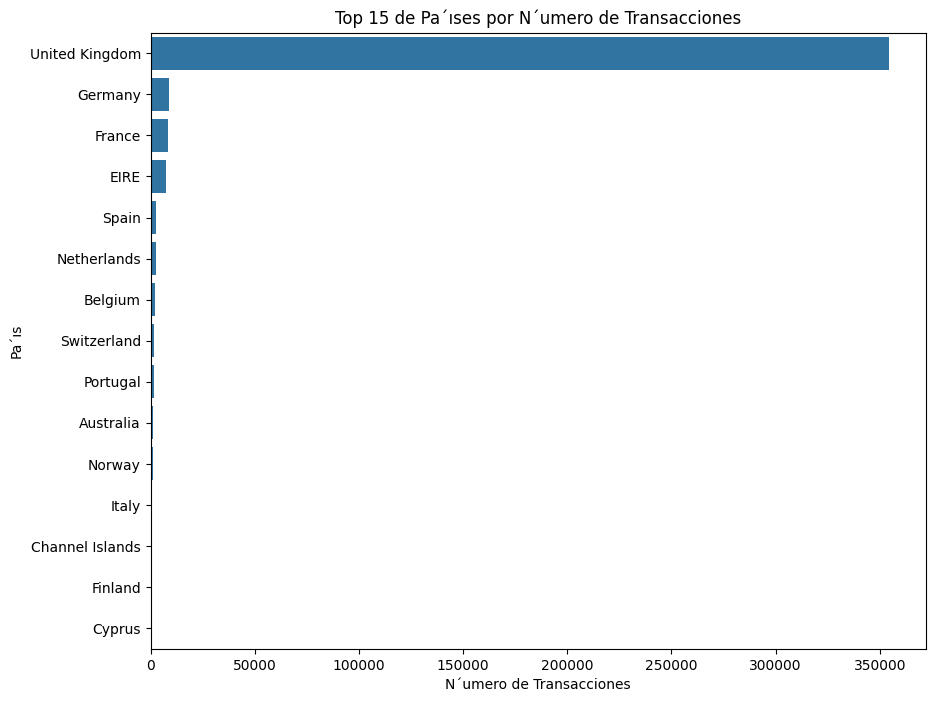

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Valores faltantes por columna:\n", data.isnull().sum())
print("\nEstad´ısticas descriptivas:\n", data.describe())
data = data.dropna(subset=['CustomerID']) # Paso adicional: eliminar filas sin cliente
data = data[data['Quantity'] > 0]
plt.figure(figsize=(10, 8))
sns.countplot(y='Country', data=data, order=data['Country'].value_counts().index[:15])
plt.title('Top 15 de Pa´ıses por N´umero de Transacciones')
plt.xlabel('N´umero de Transacciones')
plt.ylabel('Pa´ıs')
plt.show()


In [ ]:
pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


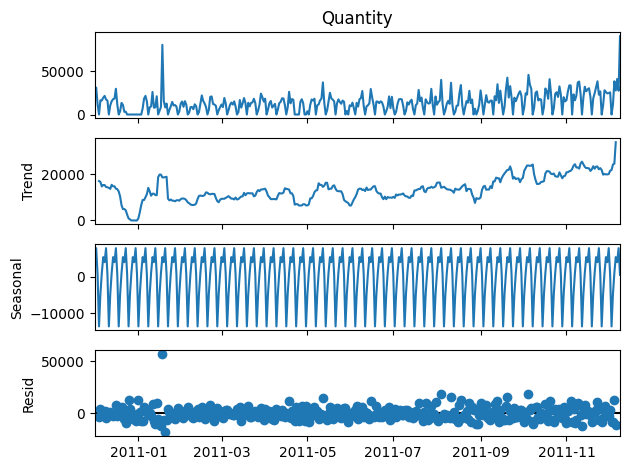

In [ ]:
 import statsmodels.api as sm

# Preparar los datos: usar InvoiceDate como ´ındice y agregar ventas diarias
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
daily_sales = data.set_index('InvoiceDate')['Quantity'].resample('D').sum()

# Realizar la descomposici´on estacional
decomposition = sm.tsa.seasonal_decompose(daily_sales.dropna(), model='additive')

#Visualizar los componentes
fig = decomposition.plot()
plt.show()

Primeras 5 filas de la serie diaria:
InvoiceDate
2010-12-01    24215
2010-12-02    31142
2010-12-03    11839
2010-12-04        0
2010-12-05    16450
Freq: D, Name: Quantity, dtype: int64


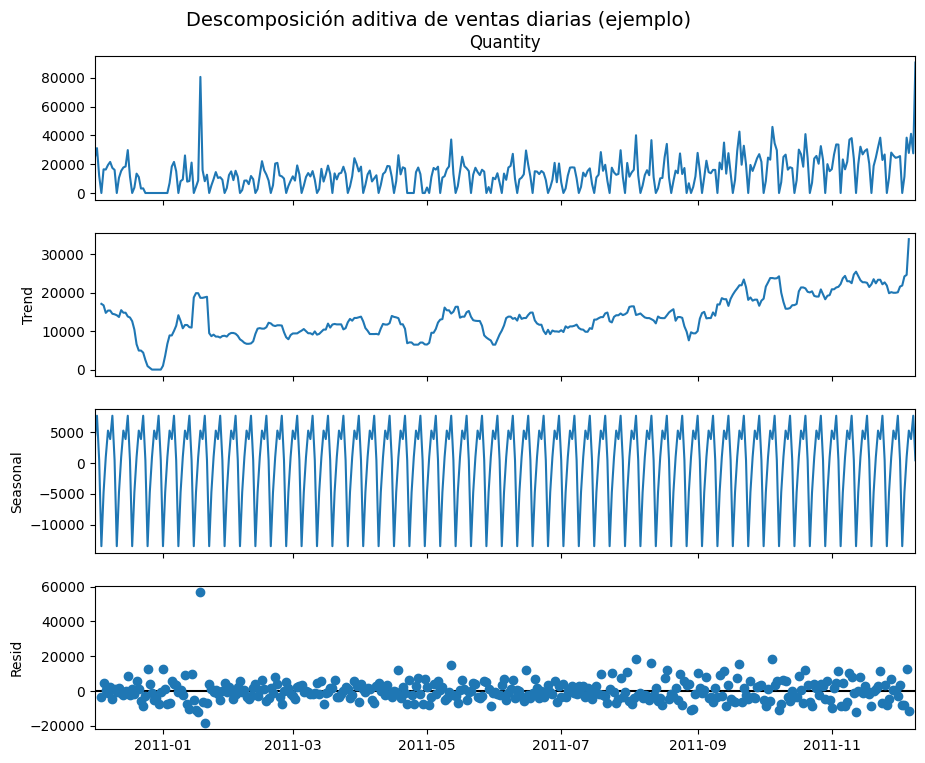

In [ ]:
# Ejemplo: descomposición de la serie temporal diaria usando statsmodels
# Comentarios:
# - Conviene convertir la columna 'InvoiceDate' a datetime y crear una serie diaria agregada.
# - Aquí usamos 'Quantity' como proxy de actividad; si dispones de 'UnitPrice' y 'Total' puedes sumar ventas monetarias.

# Instalar (si falta): pip install statsmodels
import pandas as pd
import matplotlib.pyplot as plt

# --- Preparación (suponiendo que el DataFrame original se llama data) ---
# Si tu notebook usa otro nombre de variable para el DataFrame, ajústalo.
try:
    data  # see if data exists in the notebook kernel
except NameError:
    # solo para documentación: creamos un pequeño DataFrame de ejemplo en caso de ejecución aislada
    rng = pd.date_range("2023-01-01", periods=120, freq="D")
    import numpy as np
    sample_qty = (np.sin(np.linspace(0, 6.28, len(rng))) * 20 + 50).astype(int) + (np.random.randn(len(rng))*5).astype(int)
    data = pd.DataFrame({"InvoiceDate": rng, "Quantity": sample_qty})

# Convertir y agregar
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
daily_sales = data.set_index('InvoiceDate')['Quantity'].resample('D').sum()

# Mostrar resumen rápido
print("Primeras 5 filas de la serie diaria:")
print(daily_sales.head())

# Descomposición (no ejecutar si statsmodels no está instalado)
try:
    import statsmodels.api as sm
    decomposition = sm.tsa.seasonal_decompose(daily_sales.dropna(), model='additive', period=7)
    fig = decomposition.plot()
    fig.set_size_inches(10, 8)
    plt.suptitle('Descomposición aditiva de ventas diarias (ejemplo)', fontsize=14)
    plt.show()
except Exception as e:
    print("No se pudo ejecutar la descomposición con statsmodels:", e)
    print("Si quieres ejecutar esto, instala statsmodels: pip install statsmodels")


In [ ]:

import altair as alt

# Filtrar datos válidos
subset = data[['Quantity', 'UnitPrice']].dropna()
subset = subset[subset['Quantity'] > 0]

# Crear gráfico declarativo interactivo
scatter_chart = (
    alt.Chart(subset.sample(5000))  # Muestra representativa
    .mark_circle(size=60, opacity=0.6)
    .encode(
        x=alt.X('UnitPrice', title='Precio Unitario'),
        y=alt.Y('Quantity', title='Cantidad'),
        tooltip=['Quantity', 'UnitPrice']
    )
    .interactive()  # Permite zoom y desplazamiento
    .properties(title='Gráfico Interactivo: Cantidad vs Precio Unitario')
)

scatter_chart.display()


alt.Chart(...)

In [ ]:


import pandas as pd

# -------------------------------
# BLOQUE 1: Ejemplo con Altair
# -------------------------------
try:
    import altair as alt
except Exception as e:
    print("Altair no está instalado o no se puede importar:", e)
    print("Instala con: pip install altair")
    alt = None

# Cargar el dataset
try:
    data = pd.read_excel(
        "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
    )
except Exception:
    # Dataset de respaldo en caso de error de conexión
    import numpy as np
    data = pd.DataFrame({
        'UnitPrice': (np.abs(np.random.randn(500)) * 20 + 1).round(2),
        'Quantity': (np.random.poisson(3, 500) + 1),
        'Description': ['producto'] * 500,
        'Country': ['United Kingdom'] * 500
    })

# Crear un subconjunto de datos
try:
    display_df = data[['UnitPrice', 'Quantity', 'Description', 'Country']].dropna().sample(min(1000, len(data)))
except Exception:
    display_df = data.copy()

# Mostrar gráfico Altair si está disponible
if alt is not None:
    chart = alt.Chart(display_df).mark_circle(size=60).encode(
        x='UnitPrice',
        y='Quantity',
        tooltip=['Description', 'UnitPrice', 'Quantity'],
        color='Country'
    ).interactive().properties(title='Cantidad vs Precio Unitario (Altair)')
    chart.display()
else:
    print("Altair no está disponible en este entorno.")

# -------------------------------
# BLOQUE 2: Dashboard con Dash
# -------------------------------
try:
    import dash
    from dash import dcc, html, Input, Output
    import plotly.express as px
except Exception as e:
    print("Dash/Plotly no está instalado:", e)
    print("Instala con: pip install dash plotly")
    dash = None

if dash is not None:
    # Copiar y limpiar datos
    df = data.copy()
    df = df.dropna(subset=['Description', 'Country'])
    df = df[df['Quantity'] > 0]

    # Crear la app
    app = dash.Dash(__name__)
    countries = sorted(df['Country'].dropna().unique())

    # Layout de la aplicación
    app.layout = html.Div([
        html.H2('Dashboard de Ventas - Top 10 productos por país', style={'textAlign': 'center'}),
        html.Br(),

        html.Label('Selecciona un país:', style={'fontSize': 18}),
        dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': c, 'value': c} for c in countries],
            value=countries[0],
            style={'width': '60%', 'margin': 'auto'}
        ),
        html.Br(),

        dcc.Graph(id='top-products')
    ])

    # Callback: actualiza el gráfico según el país
    @app.callback(
        Output('top-products', 'figure'),
        Input('country-dropdown', 'value')
    )
    def update_top_products(country):
        dff = df[df['Country'] == country]
        top = (dff.groupby('Description')['Quantity']
               .sum()
               .sort_values(ascending=False)
               .head(10)
               .reset_index())
        fig = px.bar(
            top,
            x='Quantity',
            y='Description',
            orientation='h',
            title=f'Top 10 productos más vendidos en {country}',
            labels={'Quantity': 'Cantidad Vendida', 'Description': 'Producto'}
        )
        fig.update_layout(yaxis={'categoryorder': 'total ascending'})
        return fig

    # Ejecutar servidor (Dash 3 usa app.run)
    if __name__ == '__main__':
        app.run(debug=True, port=8050)
else:
    print('Dash no está disponible: guarda este bloque como app_dash.py y ejecútalo en tu máquina local.')


alt.Chart(...)

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
FileNotFoundError: [Errno 2] No such file or directory: '/usr/local/lib/python3.12/dist-packages/dash/deps/react@18.3.1.js'



<IPython.core.display.Javascript object>